## Runs XGBoost code from script and it also plots top 15 contributing genes

Training size: 930, Validation size:104
[0]	training-auc:0.87342	validation-auc:0.739437
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 30 rounds.
[1]	training-auc:0.945418	validation-auc:0.823303
[2]	training-auc:0.973472	validation-auc:0.799402
[3]	training-auc:0.980037	validation-auc:0.799616
[4]	training-auc:0.98533	validation-auc:0.794067
[5]	training-auc:0.989345	validation-auc:0.784891
[6]	training-auc:0.990752	validation-auc:0.792574
[7]	training-auc:0.995697	validation-auc:0.787879
[8]	training-auc:0.996071	validation-auc:0.798122
[9]	training-auc:0.99726	validation-auc:0.787879
[10]	training-auc:0.998409	validation-auc:0.795988
[11]	training-auc:0.998783	validation-auc:0.802817
[12]	training-auc:0.999151	validation-auc:0.799402
[13]	training-auc:0.999117	validation-auc:0.804097
[14]	training-auc:0.99927	validation-auc:0.798549
[15]	training-auc:0.999547	validation-auc:0.800256
[16]	

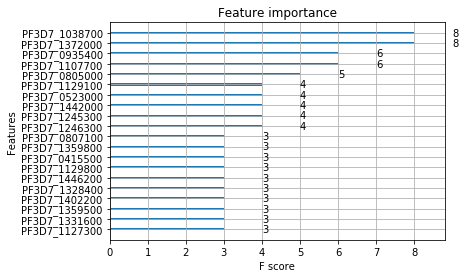

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
train = pd.read_csv("../data/SubCh2_TrainingData.csv")

# Filter out rows with Clearance rate = 'nan'
rows_to_keep = [row for row in range(len(train)) if str(train['ClearanceRate'][row]) != 'nan']
train = train.iloc[rows_to_keep,:].reset_index(drop=True)
gene_names = list(train.columns)[4:4956]

# Encode Clearance Rates as labels
y_raw = list(train['ClearanceRate'])
labelE = LabelEncoder().fit(y_raw)
y = labelE.transform(y_raw)

# Build feature matrix X
X = train.iloc[:,4:4956].values

# Split data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1)
print("Training size: {}, Validation size:{}".format(len(y_train),len(y_val)))

# Build DMatrixes for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=gene_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=gene_names)

# Declare XGBoost parameters
num_round = 200
param = {
    'booster': 'gbtree',
    'max_depth': 5,
    'eta': 0.1,
    'lambda': 1,
    'alpha': 1,
    'colsample_bytree': 0.5,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbose': 2
    }

# Prepare XGBoost run
evallist = [(dtrain, 'training'), (dval, 'validation')]

# Train model with early stopping (stop if validation score doesn't improve after 10 rounds)
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=30)

# Plot top 15 genes contributing to XGBoost
xgb.plot_importance(bst, max_num_features=20)

print("Finished")

In [84]:
feature_gains = bst.get_score(importance_type='gain')
feature_gains_df = pd.DataFrame()
feature_gains_df['Gene'] = list(feature_gains.keys())
feature_gains_df['XGBoostGain'] = list(feature_gains.values())

In [110]:
important_genes = list(feature_gains_df.sort_values(by="XGBoostGain", ascending=False).head(100)['Gene'])

In [134]:
# Save list of important genes
f = open('xgboost_SubCh2_July21st_Top100_genes.txt', 'w')
f.write("\n".join(important_genes)+"\n")
f.close()

In [130]:
new_X = train[important_genes].values
# Split data into training and validation
X_train, X_val, y_train, y_val = train_test_split(new_X,y,test_size=0.1)
print("Training size: {}, Validation size:{}".format(len(y_train),len(y_val)))

# Build DMatrixes for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=important_genes)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=important_genes)

Training size: 930, Validation size:104


[0]	training-auc:0.871472	validation-auc:0.802976
[1]	training-auc:0.923814	validation-auc:0.818155
[2]	training-auc:0.93522	validation-auc:0.865179
[3]	training-auc:0.953793	validation-auc:0.864583
[4]	training-auc:0.964568	validation-auc:0.874405
[5]	training-auc:0.97352	validation-auc:0.873214
[6]	training-auc:0.977567	validation-auc:0.886905
[7]	training-auc:0.977677	validation-auc:0.89881
[8]	training-auc:0.978891	validation-auc:0.899405
[9]	training-auc:0.981958	validation-auc:0.9
[10]	training-auc:0.983521	validation-auc:0.90119
[11]	training-auc:0.984738	validation-auc:0.895833
[12]	training-auc:0.987381	validation-auc:0.892262
[13]	training-auc:0.988328	validation-auc:0.897619
[14]	training-auc:0.98977	validation-auc:0.899405
[15]	training-auc:0.990068	validation-auc:0.894643
[16]	training-auc:0.991174	validation-auc:0.899405
[17]	training-auc:0.991923	validation-auc:0.903571
[18]	training-auc:0.992644	validation-auc:0.902381
[19]	training-auc:0.993162	validation-auc:0.903571


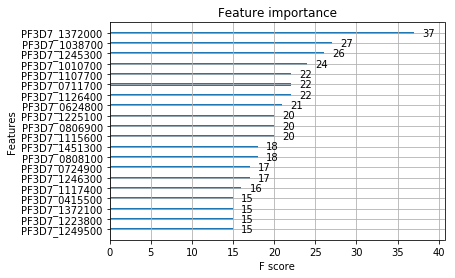

In [131]:
# Declare XGBoost parameters
num_round = 50
param = {
    'booster': 'gbtree',
    'max_depth': 5,
    'eta': 0.1,
    'lambda': 1,
    'alpha': 1,
    'colsample_bytree': 0.5,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'verbose': 1
    }

# Prepare XGBoost run
evallist = [(dtrain, 'training'), (dval, 'validation')]

# Train model with early stopping (stop if validation score doesn't improve after 10 rounds)
new_bst = xgb.train(param, dtrain, num_round, evallist)

# Plot top 15 genes contributing to XGBoost
xgb.plot_importance(new_bst, max_num_features=20)

print("Finished")

In [145]:
y_train[0:50]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [144]:
new_bst.predict(dtrain)[0:50]

array([0.0929867 , 0.18099236, 0.03195775, 0.04635876, 0.05870049,
       0.9027359 , 0.02242251, 0.21903972, 0.05524328, 0.03900386,
       0.7869904 , 0.06108579, 0.19757989, 0.09970681, 0.17906144,
       0.0324567 , 0.86265916, 0.76807994, 0.04222521, 0.02797829,
       0.65961295, 0.3454149 , 0.05235843, 0.899923  , 0.8149364 ,
       0.12776555, 0.03266413, 0.88770384, 0.04777519, 0.8366397 ,
       0.14834619, 0.04201986, 0.09579649, 0.02173538, 0.03288419,
       0.15035129, 0.05910593, 0.02264834, 0.7274121 , 0.04654683,
       0.8282165 , 0.07460906, 0.21669306, 0.09416491, 0.13383718,
       0.03832954, 0.09568746, 0.06078291, 0.08526761, 0.5399396 ],
      dtype=float32)

In [132]:
# Save model
import pickle
with open('xgboost_SubCh2_July21st.pkl', 'wb') as xgboost_model_file:
    pickle.dump(new_bst, xgboost_model_file)

# Make predictions for test set

#### 0 = Fast

#### 1 = Slow

In [2]:
test = pd.read_csv('../data/SubCh2_TestData.csv')
test.head()

Sample_Names                  Country  Asexual_Stage  \
0  isolate_02.24HR.DHA.BRep1  Thailand_Myanmar_Border             50   
1  isolate_02.24HR.DHA.BRep2  Thailand_Myanmar_Border             16   
2  isolate_02.24HR.DHA.BRep3  Thailand_Myanmar_Border              8   
3  isolate_02.24HR.DHA.BRep4  Thailand_Myanmar_Border              6   
4   isolate_02.24HR.UT.BRep1  Thailand_Myanmar_Border             48   

      Isolate Timepoint Treatment BioRep  MAL1.465720.465873.bc..rv..  \
0  isolate_02      24HR       DHA  BRep1                    -0.178971   
1  isolate_02      24HR       DHA  BRep2                     1.337421   
2  isolate_02      24HR       DHA  BRep3                    -0.717441   
3  isolate_02      24HR       DHA  BRep4                     0.143501   
4  isolate_02      24HR        UT  BRep1                    -0.078235   

   MAL1.48287.48430....kr...can  MAL1.562126.562246.bc..r...      ...        \
0                     -1.922426                    -1.875015      ...         
1                     -1.764941                    -0.414673      ...         
2                     -1.151982                    -1.693989      ...         
3                     -1.496923                    -1.219010      ...         
4                     -1.885653                    -1.350747      ...         

   PF3D7_1478800  PF3D7_1479000  PF3D7_1479200  PF3D7_1479400  PF3D7_1479500  \
0       0.790819      -0.070151       0.024133      -2.215227      -1.957654   
1       0.659458      -1.288305       0.806314      -3.733712      -1.990368   
2       0.846346       0.279816       0.115002      -1.305902      -0.679212   
3       0.927822       0.375290       1.113241      -4.016287      -1.327287   
4      -0.718147       0.193968      -0.125951       0.048244      -1.316566   

   PF3D7_1479600  PF3D7_1479900  PF3D7_1480000  PF3D7_1480100  ClearanceRate  
0      -2.188635      -1.722201      -3.995680      -0.902979            NaN  
1      -1.633418      -2.104227      -5.767710      -2.177930            NaN  
2      -2.099512      -1.626372      -4.422711      -1.408485            NaN  
3      -2.375500      -1.939162      -3.500963      -0.796143            NaN  
4      -2.247523      -1.104079      -4.776909      -2.218115            NaN  

[5 rows x 4968 columns]

## Note: I'm not averaging results across biological replicates, but we should do this in the next round

In [141]:
results = {}
for isolate in list(set(test['Isolate'])):
    tmp = test[test['Isolate']==isolate].copy().reset_index(drop=True)
    tmp_X = tmp[important_genes].values
    dtmp = xgb.DMatrix(tmp_X, feature_names=important_genes)
    tmp_y = new_bst.predict(dtmp)
    results[isolate] = tmp_y

In [8]:
test_isolates = list(set(test['Isolate']))
test_isolates.sort()

In [151]:
f = open('../submissions/lylat_SubCh2_xgboost1_2107.txt','w')
f.write("Isolate"+"\t"+"Predicted_Categorical_Clearance\n")
for isolate in test_isolates:
    f.write(isolate+"\t")
    predicted = max(results[isolate])
    if predicted < 0.5:
        f.write("Fast\n")
    else:
        f.write("Slow\n")
f.close()

# Make predictions from scratch

In [3]:
f = open('xgboost_SubCh2_July21st_Top100_genes.txt', 'r')
important_genes = f.read().splitlines()
f.close()

import pickle
f = open('xgboost_SubCh2_July21st.pkl', 'rb')
new_bst = pickle.load(f)
f.close()

In [4]:
results = {}
for isolate in list(set(test['Isolate'])):
    tmp = test[test['Isolate']==isolate].copy().reset_index(drop=True)
    tmp_X = tmp[important_genes].values
    dtmp = xgb.DMatrix(tmp_X, feature_names=important_genes)
    tmp_y = new_bst.predict(dtmp)
    results[isolate] = tmp_y

In [10]:
f = open('../submissions/lylat_SubCh2_model1_210719.txt','w')
f.write("Isolate\tPredicted_Categorical_Clearance\tProbability\n")
for isolate in test_isolates:
    f.write(isolate+"\t")
    predicted = max(results[isolate])
    if predicted < 0.5:
        f.write("FAST\t")
        f.write(str(1-predicted) + "\n")
    else:
        f.write("SLOW\t")
        f.write(str(predicted) + "\n")
f.close()

# **Prepares and runs the model for the final round (August 15th 2019)**

* This model consists of 5 XGBoost models trained on different splits of the data but with the same hyperparameters

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
train = pd.read_csv("../data/SubCh2_TrainingData.csv")

# Filter out rows with Clearance rate = 'nan'
rows_to_keep = [row for row in range(len(train)) if str(train['ClearanceRate'][row]) != 'nan']
train = train.iloc[rows_to_keep,:].reset_index(drop=True)
gene_names = list(train.columns)[4:4956]

# Encode Clearance Rates as labels
y_raw = list(train['ClearanceRate'])
labelE = LabelEncoder().fit(y_raw)
y = labelE.transform(y_raw)

# Build feature matrix X
X = train.iloc[:,4:4956].values

In [53]:
num_models = 10
for i in range(num_models):
    # Split data into training and validation
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1)
    print("Training size: {}, Validation size:{}".format(len(y_train),len(y_val)))

    # Build DMatrixes for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=gene_names)
    dval = xgb.DMatrix(X_val, label=y_val, feature_names=gene_names)

    # Declare XGBoost parameters
    num_round = 200
    param = {
        'booster': 'gbtree',
        'max_depth': 5,
        'eta': 0.1,
        'lambda': 1,
        'alpha': 1,
        'colsample_bytree': 0.5,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'verbose': 2
        }

    # Prepare XGBoost run
    evallist = [(dtrain, 'training'), (dval, 'validation')]

    # Train model with early stopping (stop if validation score doesn't improve after 10 rounds)
    bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=30)

    print("Finished training XGBoost model #{}".format(i+1))

    feature_gains = bst.get_score(importance_type='gain')
    feature_gains_df = pd.DataFrame()
    feature_gains_df['Gene'] = list(feature_gains.keys())
    feature_gains_df['XGBoostGain'] = list(feature_gains.values())
    feature_gains_df.to_csv('xgblist/xgb-{}_feature-gains.csv'.format(i+1),index=False)

    important_genes = list(feature_gains_df.sort_values(by="XGBoostGain", ascending=False).head(100)['Gene'])
    # Save list of important genes
    f = open('xgblist/xgb-{}_Top100_genes.txt'.format(i+1), 'w')
    f.write("\n".join(important_genes)+"\n")
    f.close()

Training size: 930, Validation size:104
[0]	training-auc:0.874281	validation-auc:0.605523
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 30 rounds.
[1]	training-auc:0.950541	validation-auc:0.725838
[2]	training-auc:0.976728	validation-auc:0.740385
[3]	training-auc:0.985011	validation-auc:0.721154
[4]	training-auc:0.987191	validation-auc:0.732249
[5]	training-auc:0.988456	validation-auc:0.7357
[6]	training-auc:0.992958	validation-auc:0.726331
[7]	training-auc:0.996939	validation-auc:0.726331
[8]	training-auc:0.997396	validation-auc:0.719921
[9]	training-auc:0.997262	validation-auc:0.728797
[10]	training-auc:0.997541	validation-auc:0.738659
[11]	training-auc:0.997998	validation-auc:0.750493
[12]	training-auc:0.998562	validation-auc:0.759369
[13]	training-auc:0.99893	validation-auc:0.768738
[14]	training-auc:0.999264	validation-auc:0.760355
[15]	training-auc:0.999576	validation-auc:0.772189
[16]

# Compare Top 100 genes from each of the 5 models (plus the model of submission 1)

In [55]:
f = open('xgboost_SubCh2_July21st_Top100_genes.txt','r')
toplist_0 = f.read().splitlines()
f.close()
toplists = [toplist_0]
for i in range(num_models):
    f = open('xgblist/xgb-{}_Top100_genes.txt'.format(i+1),'r')
    toplist = f.read().splitlines()
    f.close()
    toplists.append(toplist)

### Count the number of times each gene appears among the six lists

In [56]:
top_genes_dict = {}

for toplist in toplists:
    for i,gene in enumerate(toplist):
        rank = i + 1
        if gene not in top_genes_dict:
            top_genes_dict[gene] = {'appearances':1, 'rank_sum':rank}
        else:
            top_genes_dict[gene]['appearances'] += 1
            top_genes_dict[gene]['rank_sum'] += rank

for gene in top_genes_dict:
    top_genes_dict[gene]['rank_avg'] =  top_genes_dict[gene]['rank_sum']/top_genes_dict[gene]['appearances'] 

In [57]:
top_genes_df  = pd.DataFrame.from_dict(top_genes_dict)

In [58]:
top_genes_df

PF3D7_1479600  PF3D7_1225100  PF3D7_0808100  PF3D7_1246300  \
appearances            2.0            1.0            3.0      11.000000   
rank_avg              22.0            2.0           15.0       6.363636   
rank_sum              44.0            2.0           45.0      70.000000   

             PF3D7_1427900  PF3D7_1410800  PF3D7_1121500  PF3D7_0820400  \
appearances            1.0            1.0           4.00            1.0   
rank_avg               5.0            6.0          35.75            8.0   
rank_sum               5.0            6.0         143.00            8.0   

             PF3D7_0524400  PF3D7_0315400      ...        PF3D7_1001500  \
appearances            2.0            1.0      ...                  1.0   
rank_avg              25.0           10.0      ...                 86.0   
rank_sum              50.0           10.0      ...                 86.0   

             PF3D7_1202600  PF3D7_1112900  PF3D7_1224100  PF3D7_1025300  \
appearances            1.0            1.0            1.0            1.0   
rank_avg              88.0           89.0           90.0           91.0   
rank_sum              88.0           89.0           90.0           91.0   

             PF3D7_0209500  PF3D7_1240400  PF3D7_1135300  PF3D7_1446800  \
appearances            1.0            1.0            1.0            1.0   
rank_avg              92.0           93.0           97.0           98.0   
rank_sum              92.0           93.0           97.0           98.0   

             PF3D7_0706000  
appearances            1.0  
rank_avg              99.0  
rank_sum              99.0  

[3 rows x 711 columns]

(array([531., 106.,  28.,  19.,   4.,   8.,   4.,   5.,   2.,   4.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

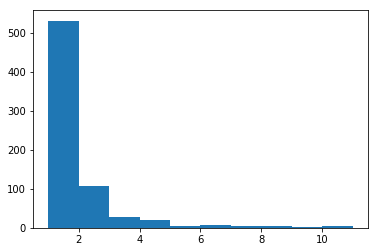

In [59]:
plt.hist(top_genes_df.loc['appearances'].values)

In [60]:
top_genes_final = top_genes_df.transpose().loc[top_genes_df.transpose()['appearances']>=2]

In [61]:
top_genes_final.head()

appearances   rank_avg  rank_sum
PF3D7_1479600          2.0  22.000000      44.0
PF3D7_0808100          3.0  15.000000      45.0
PF3D7_1246300         11.0   6.363636      70.0
PF3D7_1121500          4.0  35.750000     143.0
PF3D7_0524400          2.0  25.000000      50.0

(array([ 6., 16., 17., 27., 23., 25., 27., 11., 18., 10.]),
 array([ 2. , 11.1, 20.2, 29.3, 38.4, 47.5, 56.6, 65.7, 74.8, 83.9, 93. ]),
 <a list of 10 Patch objects>)

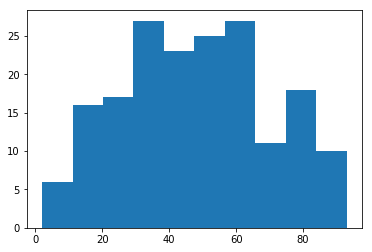

In [62]:
plt.hist(top_genes_final['rank_avg'].values)

(array([106.,  28.,  19.,   4.,   8.,   4.,   5.,   2.,   1.,   3.]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <a list of 10 Patch objects>)

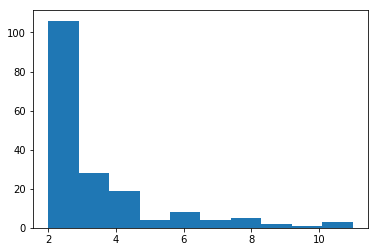

In [63]:
plt.hist(top_genes_final['appearances'].values)

In [76]:
len(important_genes)

180

In [77]:
f = open('xgboost_SubCh2_August15th_Top100_genes.txt','w')
f.write('\n'.join(important_genes))
f.close()

# Now, we will take these final genes (which appear at least 2 times across all top lists) and train 10 XGBoost models with different splits

In [80]:
new_X = train[important_genes].values
# Initialize list of XGBoost models we will use
xgblist = []

for i in range(10):
    # Split data into training and validation
    X_train, X_val, y_train, y_val = train_test_split(new_X,y,test_size=0.1)
    print("Training size: {}, Validation size:{}".format(len(y_train),len(y_val)))

    # Build DMatrixes for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=important_genes)
    dval = xgb.DMatrix(X_val, label=y_val, feature_names=important_genes)

    # Declare XGBoost parameters
    num_round = 50
    param = {
        'booster': 'gbtree',
        'max_depth': 5,
        'eta': 0.1,
        'lambda': 1,
        'alpha': 1,
        'colsample_bytree': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'verbose': 1
        }

    # Prepare XGBoost run
    evallist = [(dtrain, 'training'), (dval, 'validation')]

    # Train model with early stopping (stop if validation score doesn't improve after 10 rounds)
    new_bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=30)

    # Save model
    import pickle
    with open('xgboost_SubCh2_August15th_{}.pkl'.format(i+1), 'wb') as xgboost_model_file:
        pickle.dump(new_bst, xgboost_model_file)

Training size: 930, Validation size:104
[0]	training-auc:0.884951	validation-auc:0.68822
Multiple eval metrics have been passed: 'validation-auc' will be used for early stopping.

Will train until validation-auc hasn't improved in 30 rounds.
[1]	training-auc:0.954848	validation-auc:0.779129
[2]	training-auc:0.975578	validation-auc:0.800256
[3]	training-auc:0.976725	validation-auc:0.790653
[4]	training-auc:0.978267	validation-auc:0.790653
[5]	training-auc:0.981512	validation-auc:0.795561
[6]	training-auc:0.985169	validation-auc:0.799829
[7]	training-auc:0.987111	validation-auc:0.799829
[8]	training-auc:0.99097	validation-auc:0.795988
[9]	training-auc:0.992974	validation-auc:0.784891
[10]	training-auc:0.993608	validation-auc:0.788732
[11]	training-auc:0.994344	validation-auc:0.798976
[12]	training-auc:0.995425	validation-auc:0.790013
[13]	training-auc:0.996275	validation-auc:0.793854
[14]	training-auc:0.996824	validation-auc:0.795134
[15]	training-auc:0.997367	validation-auc:0.800256
[16

# Use these 10 models to vote on the test-set

Fast = 0

Slow = 1

In [85]:
test = pd.read_csv('../data/SubCh2_TestData.csv')
test_isolates = list(set(test['Isolate']))
test_isolates.sort()

# Make list of 10 XGBoost models
xgb_models = []

for i in range(10):
    f = open('xgboost_SubCh2_August15th_{}.pkl'.format(i+1), 'rb')
    new_bst = pickle.load(f)
    f.close()
    xgb_models.append(new_bst)

# results = {'model-1': {'isolate-name':[prediction-value,prediction-label]}}
results = {}
for i in range(10):
    new_bst = xgb_models[i]
    model = 'model_{}'.format(i+1)
    results[model] = {}
    for isolate in test_isolates:
        tmp = test[test['Isolate']==isolate].copy().reset_index(drop=True)
        tmp_X = tmp[important_genes].values
        dtmp = xgb.DMatrix(tmp_X, feature_names=important_genes)
        tmp_y = new_bst.predict(dtmp)
        predicted = max(tmp_y)
        results[model][isolate] = {}
        if predicted < 0.5:
            results[model][isolate]['Clearance'] = 'FAST'
            results[model][isolate]['Probability'] = 1 - predicted
        else:
            results[model][isolate]['Clearance'] = 'SLOW'
            results[model][isolate]['Probability'] = predicted

In [88]:
results_df = pd.DataFrame.from_dict(results)

In [100]:
results_df

model_1  \
isolate_02   {'Clearance': 'SLOW', 'Probability': 0.56543124}   
isolate_09   {'Clearance': 'SLOW', 'Probability': 0.52517885}   
isolate_10  {'Clearance': 'FAST', 'Probability': 0.6069355...   
isolate_11    {'Clearance': 'SLOW', 'Probability': 0.6494968}   
isolate_12   {'Clearance': 'SLOW', 'Probability': 0.53964055}   
isolate_13    {'Clearance': 'SLOW', 'Probability': 0.5459248}   
isolate_14   {'Clearance': 'SLOW', 'Probability': 0.60162395}   
isolate_16   {'Clearance': 'SLOW', 'Probability': 0.54340905}   
isolate_18  {'Clearance': 'FAST', 'Probability': 0.5196741...   
isolate_19    {'Clearance': 'SLOW', 'Probability': 0.6073911}   
isolate_20     {'Clearance': 'SLOW', 'Probability': 0.695279}   
isolate_22   {'Clearance': 'SLOW', 'Probability': 0.57320434}   
isolate_23    {'Clearance': 'SLOW', 'Probability': 0.5773972}   
isolate_24  {'Clearance': 'FAST', 'Probability': 0.5233809...   
isolate_27     {'Clearance': 'SLOW', 'Probability': 0.558001}   
isolate_29   {'Clearance': 'SLOW', 'Probability': 0.51897687}   
isolate_30   {'Clearance': 'SLOW', 'Probability': 0.55717677}   
isolate_31    {'Clearance': 'SLOW', 'Probability': 0.6660018}   
isolate_32    {'Clearance': 'SLOW', 'Probability': 0.6268708}   
isolate_35    {'Clearance': 'SLOW', 'Probability': 0.5981575}   
isolate_38  {'Clearance': 'FAST', 'Probability': 0.5767624...   
isolate_39    {'Clearance': 'SLOW', 'Probability': 0.7197007}   
isolate_40    {'Clearance': 'SLOW', 'Probability': 0.6263158}   
isolate_42   {'Clearance': 'SLOW', 'Probability': 0.56973886}   
isolate_43  {'Clearance': 'FAST', 'Probability': 0.5248228...   
isolate_44   {'Clearance': 'SLOW', 'Probability': 0.69001967}   
isolate_46    {'Clearance': 'SLOW', 'Probability': 0.5166968}   
isolate_47    {'Clearance': 'SLOW', 'Probability': 0.6666812}   
isolate_50    {'Clearance': 'SLOW', 'Probability': 0.6767338}   
isolate_51    {'Clearance': 'SLOW', 'Probability': 0.6217826}   
isolate_53  {'Clearance': 'FAST', 'Probability': 0.5017119...   
isolate_54   {'Clearance': 'SLOW', 'Probability': 0.63628536}   

                                                      model_2  \
isolate_02  {'Clearance': 'FAST', 'Probability': 0.5289013...   
isolate_09  {'Clearance': 'FAST', 'Probability': 0.5941247...   
isolate_10  {'Clearance': 'FAST', 'Probability': 0.6248933...   
isolate_11      {'Clearance': 'SLOW', 'Probability': 0.52904}   
isolate_12  {'Clearance': 'FAST', 'Probability': 0.6019702...   
isolate_13  {'Clearance': 'FAST', 'Probability': 0.5528375...   
isolate_14    {'Clearance': 'SLOW', 'Probability': 0.8005249}   
isolate_16  {'Clearance': 'FAST', 'Probability': 0.5454744...   
isolate_18  {'Clearance': 'FAST', 'Probability': 0.5855696...   
isolate_19  {'Clearance': 'FAST', 'Probability': 0.5573531...   
isolate_20   {'Clearance': 'SLOW', 'Probability': 0.60376316}   
isolate_22  {'Clearance': 'FAST', 'Probability': 0.5752935...   
isolate_23   {'Clearance': 'SLOW', 'Probability': 0.60237855}   
isolate_24    {'Clearance': 'SLOW', 'Probability': 0.5534914}   
isolate_27    {'Clearance': 'SLOW', 'Probability': 0.6273862}   
isolate_29  {'Clearance': 'FAST', 'Probability': 0.5462041...   
isolate_30  {'Clearance': 'FAST', 'Probability': 0.5305815...   
isolate_31    {'Clearance': 'SLOW', 'Probability': 0.7191829}   
isolate_32   {'Clearance': 'SLOW', 'Probability': 0.56662816}   
isolate_35   {'Clearance': 'SLOW', 'Probability': 0.56273216}   
isolate_38  {'Clearance': 'FAST', 'Probability': 0.5515766...   
isolate_39    {'Clearance': 'SLOW', 'Probability': 0.7717931}   
isolate_40   {'Clearance': 'SLOW', 'Probability': 0.71220315}   
isolate_42    {'Clearance': 'SLOW', 'Probability': 0.5321199}   
isolate_43  {'Clearance': 'FAST', 'Probability': 0.5824888...   
isolate_44   {'Clearance': 'SLOW', 'Probability': 0.50249684}   
isolate_46  {'Clearance': 'FAST', 'Probability': 0.5395435...   
isolate_47  {'Clearance': 'FAST', 'Probability': 0.5374222...   
isolate_50  {'Clearance

In [93]:
results_df['model_1']['isolate_02']

{'Clearance': 'SLOW', 'Probability': 0.56543124}

In [94]:
isolates = list(results_df.index)
models = list(results_df.columns)

In [103]:
def getAnswer(isolate):
    slow_count = 0
    slow_probs = []
    fast_count = 0
    fast_probs = []
    for model in models:
        clearance = results_df[model][isolate]['Clearance']
        if clearance == 'SLOW':
            slow_count += 1
            slow_probs.append(results_df[model][isolate]['Probability'])
        else:
            fast_count += 1
            fast_probs.append(results_df[model][isolate]['Probability'])
    # Vote and decide
    if slow_count > 5:
        return 'SLOW',np.max(slow_probs)
    elif slow_count == 5:
        if np.mean(slow_probs) > np.mean(fast_probs):
            return 'SLOW', np.mean(slow_probs)
        else:
            return 'FAST', np.mean(fast_probs)
    else:
        return 'FAST', np.max(fast_probs)

In [104]:
for isolate in isolates:
    label,prob = getAnswer(isolate)
    print("{} is {} with P={}".format(isolate,label,prob))

isolate_02 is SLOW with P=0.7219117879867554
isolate_09 is FAST with P=0.6895735859870911
isolate_10 is FAST with P=0.6888995468616486
isolate_11 is SLOW with P=0.6494967937469482
isolate_12 is SLOW with P=0.7556531429290771
isolate_13 is SLOW with P=0.650129497051239
isolate_14 is SLOW with P=0.800524890422821
isolate_16 is SLOW with P=0.6177269816398621
isolate_18 is FAST with P=0.6910252571105957
isolate_19 is SLOW with P=0.5551971197128296
isolate_20 is SLOW with P=0.7396090626716614
isolate_22 is FAST with P=0.6485936939716339
isolate_23 is SLOW with P=0.69096440076828
isolate_24 is FAST with P=0.6226050555706024
isolate_27 is SLOW with P=0.7163053750991821
isolate_29 is FAST with P=0.5784158408641815
isolate_30 is SLOW with P=0.7136566042900085
isolate_31 is SLOW with P=0.7191829085350037
isolate_32 is SLOW with P=0.7240229249000549
isolate_35 is SLOW with P=0.6134385466575623
isolate_38 is SLOW with P=0.632348358631134
isolate_39 is SLOW with P=0.7717931270599365
isolate_40 is S

In [111]:
def getAnswer2(isolate):
    slow_count = 0
    slow_probs = []
    fast_count = 0
    fast_probs = []
    for model in models:
        clearance = results_df[model][isolate]['Clearance']
        if clearance == 'SLOW':
            slow_count += 1
            slow_probs.append(results_df[model][isolate]['Probability'])
        else:
            fast_count += 1
            fast_probs.append(results_df[model][isolate]['Probability'])
    # Vote and decide
    if slow_count == 10:
        return 'SLOW', np.mean(slow_probs)
    elif fast_count == 10:
        return 'FAST', np.mean(fast_probs)
    if np.max(slow_probs) > np.max(fast_probs):
        return 'SLOW', np.mean(slow_probs)
    else:
        return 'FAST', np.mean(fast_probs)

In [112]:
for isolate in isolates:
    label,prob = getAnswer2(isolate)
    print("{} is {} with P={}".format(isolate,label,prob))

isolate_02 is SLOW with P=0.616379976272583
isolate_09 is FAST with P=0.6183261685073376
isolate_10 is FAST with P=0.5969373087088267
isolate_11 is SLOW with P=0.5854848623275757
isolate_12 is SLOW with P=0.6050086617469788
isolate_13 is SLOW with P=0.5552813410758972
isolate_14 is SLOW with P=0.6877840757369995
isolate_16 is FAST with P=0.6027029156684875
isolate_18 is FAST with P=0.5711420066654682
isolate_19 is SLOW with P=0.5551971197128296
isolate_20 is SLOW with P=0.6153538823127747
isolate_22 is FAST with P=0.5778665045897166
isolate_23 is SLOW with P=0.5661366581916809
isolate_24 is SLOW with P=0.5854410529136658
isolate_27 is SLOW with P=0.6149607300758362
isolate_29 is SLOW with P=0.5459591150283813
isolate_30 is SLOW with P=0.5977011919021606
isolate_31 is SLOW with P=0.6220228672027588
isolate_32 is SLOW with P=0.6293643712997437
isolate_35 is SLOW with P=0.5793295502662659
isolate_38 is FAST with P=0.5700168535113335
isolate_39 is SLOW with P=0.6333728432655334
isolate_40 

# Construct new XGBoosts only if best_score >= 0.92

In [8]:
# Read important genes
f = open('xgboost_SubCh2_July21st_Top100_genes.txt','r')
important_genes_july = f.read().splitlines()
f.close()

f = open('xgboost_SubCh2_August15th_Top100_genes.txt','r')
important_genes_august = f.read().splitlines()
f.close()

important_genes = list(set(important_genes_july + important_genes_august))

In [53]:
important_genes = important_genes_july

In [54]:
len(important_genes)

100

In [12]:
import pickle

In [55]:
num_models = 10
success = 0
thr = 0.92
new_X = train[important_genes].values
iterations = 0
while success < num_models:
    X_train, X_val, y_train, y_val = train_test_split(new_X,y,test_size=0.1)

    # Build DMatrixes for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=important_genes)
    dval = xgb.DMatrix(X_val, label=y_val, feature_names=important_genes)

    # Declare XGBoost parameters
    num_round = 50
    param = {
        'booster': 'gbtree',
        'max_depth': 5,
        'eta': 0.1,
        'lambda': 1,
        'alpha': 1,
        'colsample_bytree': 0.5,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'verbose': 0
        }

    # Prepare XGBoost run
    evallist = [(dtrain, 'training'), (dval, 'validation')]

    # Train model with early stopping (stop if validation score doesn't improve after 10 rounds)
    new_bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=30, verbose_eval=False)
    
    iterations += 1
    
    if new_bst.best_score >= thr:
        print("Found a good model after {} iterations!".format(iterations))
        # Save model
        with open('xgboost_SubCh2_FINAL_MODEL_August15th_{}.pkl'.format(success + 1), 'wb') as xgboost_model_file:
            pickle.dump(new_bst, xgboost_model_file)
        success += 1

Found a good model after 73 iterations!
Found a good model after 94 iterations!
Found a good model after 95 iterations!
Found a good model after 137 iterations!
Found a good model after 166 iterations!
Found a good model after 183 iterations!
Found a good model after 249 iterations!
Found a good model after 284 iterations!
Found a good model after 307 iterations!
Found a good model after 316 iterations!


# Use these 10 models to vote on the test-set

Fast = 0

Slow = 1

In [56]:
test = pd.read_csv('../data/SubCh2_TestData.csv')
test_isolates = list(set(test['Isolate']))
test_isolates.sort()

In [57]:
# Make list of 10 XGBoost models
xgb_models = []
    
for i in range(10):
    f = open('xgboost_SubCh2_FINAL_MODEL_August15th_{}.pkl'.format(i+1), 'rb')
    new_bst = pickle.load(f)
    f.close()
    xgb_models.append(new_bst)

# results = {'model-1': {'isolate-name':[prediction-value,prediction-label]}}
results = {}
for i in range(len(xgb_models)):
    new_bst = xgb_models[i]
    model = 'model_{}'.format(i+1)
    results[model] = {}
    for isolate in test_isolates:
        tmp = test[test['Isolate']==isolate].copy().reset_index(drop=True)
        tmp_X = tmp[important_genes].values
        dtmp = xgb.DMatrix(tmp_X, feature_names=important_genes)
        tmp_y = new_bst.predict(dtmp)
        predicted = max(tmp_y)
        results[model][isolate] = {}
        if predicted < 0.5:
            results[model][isolate]['Clearance'] = 'FAST'
            results[model][isolate]['Probability'] = 1 - predicted
        else:
            results[model][isolate]['Clearance'] = 'SLOW'
            results[model][isolate]['Probability'] = predicted

In [58]:
results_df = pd.DataFrame.from_dict(results)

In [59]:
results_df

model_1  \
isolate_02    {'Clearance': 'SLOW', 'Probability': 0.6007491}   
isolate_09  {'Clearance': 'FAST', 'Probability': 0.5922773...   
isolate_10  {'Clearance': 'FAST', 'Probability': 0.5113372...   
isolate_11    {'Clearance': 'SLOW', 'Probability': 0.6165138}   
isolate_12   {'Clearance': 'SLOW', 'Probability': 0.63715565}   
isolate_13  {'Clearance': 'FAST', 'Probability': 0.5724553...   
isolate_14      {'Clearance': 'SLOW', 'Probability': 0.64116}   
isolate_16    {'Clearance': 'SLOW', 'Probability': 0.5437344}   
isolate_18    {'Clearance': 'SLOW', 'Probability': 0.5010936}   
isolate_19    {'Clearance': 'SLOW', 'Probability': 0.6802785}   
isolate_20     {'Clearance': 'SLOW', 'Probability': 0.557159}   
isolate_22  {'Clearance': 'FAST', 'Probability': 0.5896891...   
isolate_23   {'Clearance': 'SLOW', 'Probability': 0.55976903}   
isolate_24    {'Clearance': 'SLOW', 'Probability': 0.6938897}   
isolate_27    {'Clearance': 'SLOW', 'Probability': 0.6577504}   
isolate_29  {'Clearance': 'FAST', 'Probability': 0.5465898...   
isolate_30   {'Clearance': 'SLOW', 'Probability': 0.51429826}   
isolate_31   {'Clearance': 'SLOW', 'Probability': 0.54770035}   
isolate_32  {'Clearance': 'FAST', 'Probability': 0.5064513...   
isolate_35  {'Clearance': 'FAST', 'Probability': 0.5375811...   
isolate_38   {'Clearance': 'SLOW', 'Probability': 0.53121847}   
isolate_39    {'Clearance': 'SLOW', 'Probability': 0.6719297}   
isolate_40    {'Clearance': 'SLOW', 'Probability': 0.5606295}   
isolate_42    {'Clearance': 'SLOW', 'Probability': 0.6322738}   
isolate_43   {'Clearance': 'SLOW', 'Probability': 0.52933645}   
isolate_44  {'Clearance': 'FAST', 'Probability': 0.5651688...   
isolate_46  {'Clearance': 'FAST', 'Probability': 0.5558568...   
isolate_47  {'Clearance': 'FAST', 'Probability': 0.5173844...   
isolate_50    {'Clearance': 'SLOW', 'Probability': 0.5478607}   
isolate_51    {'Clearance': 'SLOW', 'Probability': 0.7181578}   
isolate_53  {'Clearance': 'FAST', 'Probability': 0.5235876...   
isolate_54   {'Clearance': 'SLOW', 'Probability': 0.67911714}   

                                                      model_2  \
isolate_02  {'Clearance': 'FAST', 'Probability': 0.5172866...   
isolate_09    {'Clearance': 'SLOW', 'Probability': 0.5115097}   
isolate_10    {'Clearance': 'SLOW', 'Probability': 0.6602565}   
isolate_11  {'Clearance': 'FAST', 'Probability': 0.7093133...   
isolate_12  {'Clearance': 'FAST', 'Probability': 0.5147201...   
isolate_13  {'Clearance': 'FAST', 'Probability': 0.5649346...   
isolate_14  {'Clearance': 'FAST', 'Probability': 0.6075397...   
isolate_16  {'Clearance': 'FAST', 'Probability': 0.5442114...   
isolate_18  {'Clearance': 'FAST', 'Probability': 0.5242348...   
isolate_19    {'Clearance': 'SLOW', 'Probability': 0.5857749}   
isolate_20  {'Clearance': 'FAST', 'Probability': 0.6140878...   
isolate_22  {'Clearance': 'FAST', 'Probability': 0.6076788...   
isolate_23     {'Clearance': 'SLOW', 'Probability': 0.544075}   
isolate_24    {'Clearance': 'SLOW', 'Probability': 0.6576681}   
isolate_27      {'Clearance': 'SLOW', 'Probability': 0.64725}   
isolate_29  {'Clearance': 'FAST', 'Probability': 0.5916379...   
isolate_30   {'Clearance': 'SLOW', 'Probability': 0.57672733}   
isolate_31  {'Clearance': 'FAST', 'Probability': 0.5625721...   
isolate_32   {'Clearance': 'SLOW', 'Probability': 0.57681364}   
isolate_35  {'Clearance': 'FAST', 'Probability': 0.5305175...   
isolate_38  {'Clearance': 'FAST', 'Probability': 0.6210277...   
isolate_39   {'Clearance': 'SLOW', 'Probability': 0.55906385}   
isolate_40    {'Clearance': 'SLOW', 'Probability': 0.6259498}   
isolate_42   {'Clearance': 'SLOW', 'Probability': 0.54813236}   
isolate_43   {'Clearance': 'SLOW', 'Probability': 0.52542955}   
isolate_44    {'Clearance': 'SLOW', 'Probability': 0.5792408}   
isolate_46  {'Clearance': 'FAST', 'Probability': 0.6830464...   
isolate_47  {'Clearance': 'FAST', 'Probability': 0.5519400...   
isolate_50    {'Clearan

In [60]:
isolates = list(results_df.index)
models = list(results_df.columns)

In [70]:
def getAnswer(isolate):
    slow_count = 0
    slow_probs = []
    fast_count = 0
    fast_probs = []
    for model in models:
        clearance = results_df[model][isolate]['Clearance']
        if clearance == 'SLOW':
            slow_count += 1
            slow_probs.append(results_df[model][isolate]['Probability'])
        else:
            fast_count += 1
            fast_probs.append(results_df[model][isolate]['Probability'])
    # Vote and decide
    if slow_count > 5:
        return 'SLOW',np.max(slow_probs), slow_count
    elif slow_count == 5:
        if np.mean(slow_probs) > np.mean(fast_probs):
            return 'SLOW', np.max(slow_probs), slow_count
        else:
            return 'FAST', np.max(fast_probs), fast_count
    else:
        return 'FAST', np.max(fast_probs), fast_count

In [72]:
for isolate in isolates:
    label,prob,count = getAnswer(isolate)
    print("{} is {} with {} votes and P={}".format(isolate,label,count, prob))

isolate_02 is SLOW with 6 votes and P=0.6352077126502991
isolate_09 is FAST with 7 votes and P=0.6518680155277252
isolate_10 is SLOW with 8 votes and P=0.6630972027778625
isolate_11 is SLOW with 6 votes and P=0.632563591003418
isolate_12 is SLOW with 6 votes and P=0.6898425817489624
isolate_13 is FAST with 9 votes and P=0.6822351813316345
isolate_14 is SLOW with 9 votes and P=0.6411600112915039
isolate_16 is SLOW with 6 votes and P=0.5922992825508118
isolate_18 is SLOW with 5 votes and P=0.7673450708389282
isolate_19 is SLOW with 10 votes and P=0.680278480052948
isolate_20 is SLOW with 6 votes and P=0.6238448023796082
isolate_22 is FAST with 7 votes and P=0.6107423305511475
isolate_23 is SLOW with 8 votes and P=0.6710721254348755
isolate_24 is SLOW with 10 votes and P=0.8130152821540833
isolate_27 is SLOW with 10 votes and P=0.7790682911872864
isolate_29 is FAST with 7 votes and P=0.636214941740036
isolate_30 is SLOW with 9 votes and P=0.7694178819656372
isolate_31 is FAST with 6 votes

# Write FINAL RESULTS!

In [73]:
f = open('../submissions/lylat_SubCh2_model2_150819.txt','w')
f.write("Isolate\tPredicted_Categorical_Clearance\tProbability\n")
for isolate in isolates:
    label, prob, count = getAnswer(isolate)
    f.write("\t".join([isolate, label, str(prob)]))
    f.write("\n")
f.close()